# Handling Missing Categorical Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/categorical_data.csv')

In [3]:
df.sample(3)

,FireplaceQu,GarageQual,SalePrice
532,Po,TA,107500
424,Gd,TA,139000
553,NaN,TA,108000


In [5]:
df.shape

(1460, 3)

In [4]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

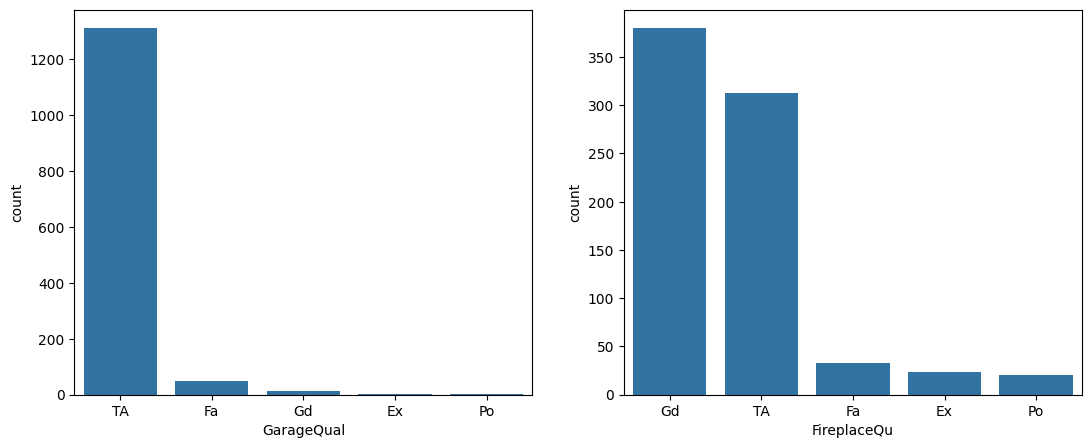

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(13,5))

sns.barplot(df['GarageQual'].value_counts(),ax=ax1)
sns.barplot(df['FireplaceQu'].value_counts(),ax=ax2)
plt.show()

In [12]:
print(df['FireplaceQu'].mode())
print(df['GarageQual'].mode())

0    Gd
Name: FireplaceQu, dtype: object
0    TA
Name: GarageQual, dtype: object


## Simple Imputer:

1. Most frequent imputation: Replaces missing values with the most frequent value in the dataset.
2. Constant imputation: Replaces missing values with a constant value specified by the user.

### 1. Mode: Most frequent imputation

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

In [8]:
new_X_train = imputer.fit_transform(X_train)
new_X_test = imputer.transform(X_test)

In [25]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

In [10]:
new_X_train = pd.DataFrame(new_X_train, columns=X_train.columns)
new_X_test = pd.DataFrame(new_X_test, columns=X_test.columns)

In [11]:
new_X_train

,FireplaceQu,GarageQual
0,Gd,TA
1,Gd,TA
2,Gd,TA
3,Gd,TA
4,TA,TA
...,...,...
1163,Gd,TA
1164,Gd,TA
1165,Gd,TA
1166,TA,TA


In [12]:
new_X_train.isnull().sum()

FireplaceQu    0
GarageQual     0
dtype: int64

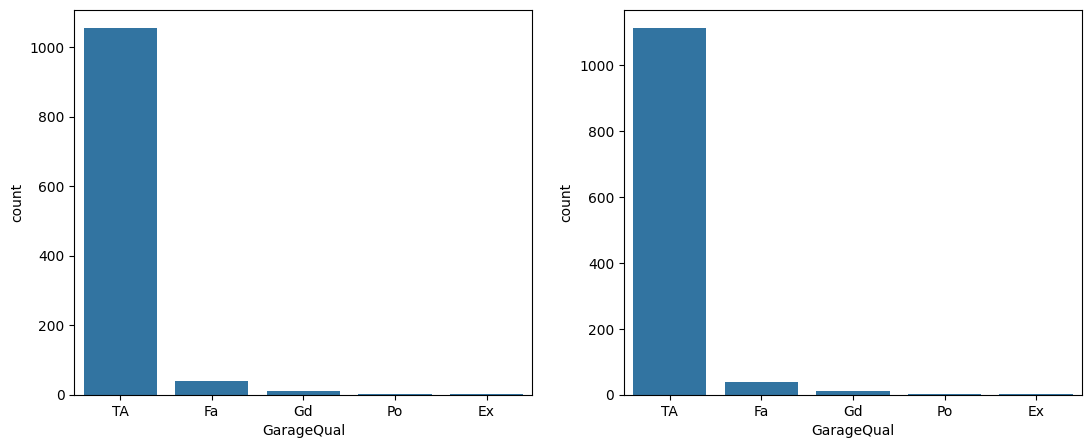

In [29]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(13,5))

sns.barplot(X_train['GarageQual'].value_counts(),ax=ax1)
sns.barplot(new_X_train['GarageQual'].value_counts(),ax=ax2)
plt.show()

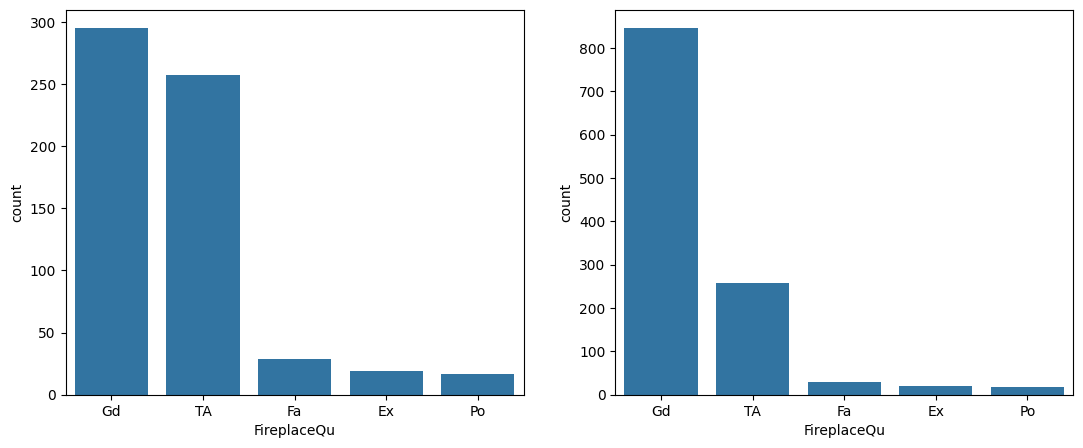

In [30]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(13,5))

sns.barplot(X_train['FireplaceQu'].value_counts(),ax=ax1)
sns.barplot(new_X_train['FireplaceQu'].value_counts(),ax=ax2)
plt.show()

### 2. Constant imputation:

In [14]:
X_train

,FireplaceQu,GarageQual
618,Gd,TA
870,NaN,TA
92,NaN,TA
817,Gd,TA
302,TA,TA
...,...,...
763,Gd,TA
835,NaN,TA
1216,NaN,TA
559,TA,TA


In [15]:
X_train.isnull().sum()

FireplaceQu    551
GarageQual      58
dtype: int64

In [34]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [ ]:
new_X_train = imputer.fit_transform(X_train)
new_X_test = imputer.transform(X_test)

In [36]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

In [37]:
new_X_train = pd.DataFrame(new_X_train, columns=X_train.columns)
new_X_test = pd.DataFrame(new_X_test, columns=X_test.columns)

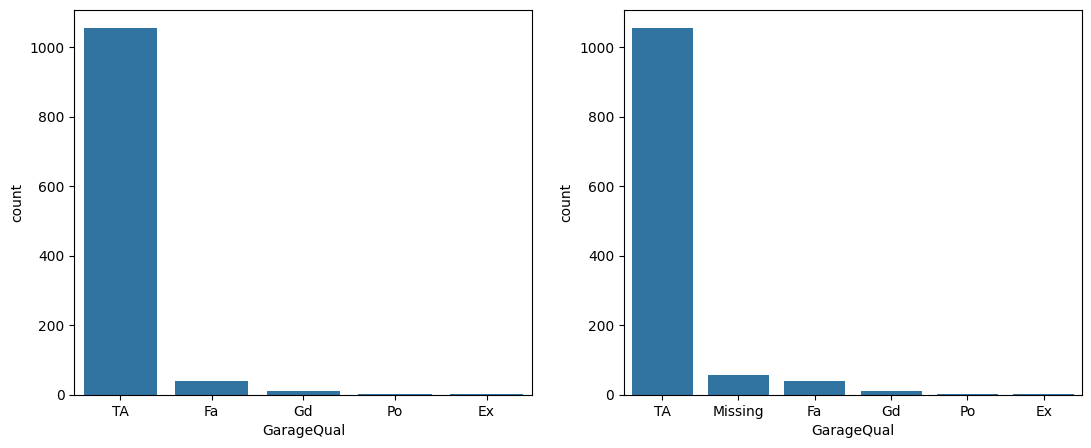

In [38]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(13,5))

sns.barplot(X_train['GarageQual'].value_counts(),ax=ax1)
sns.barplot(new_X_train['GarageQual'].value_counts(),ax=ax2)
plt.show()

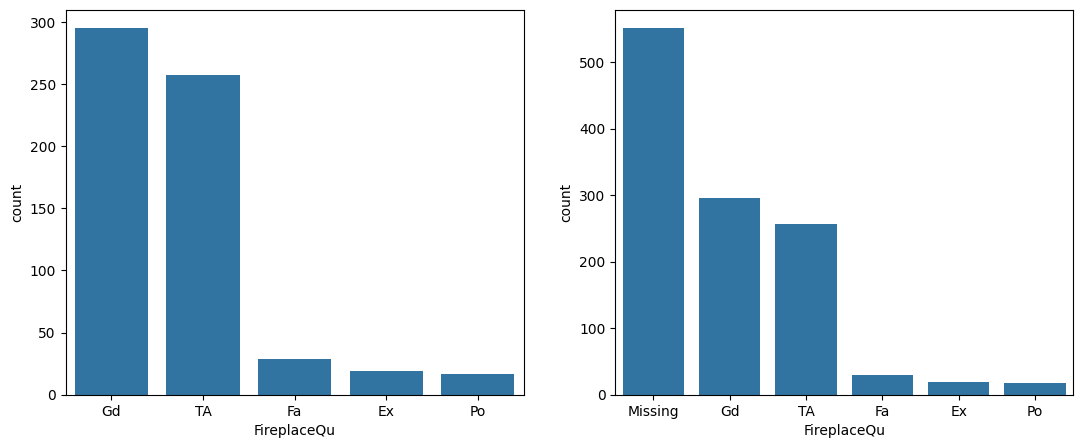

In [39]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(13,5))

sns.barplot(X_train['FireplaceQu'].value_counts(),ax=ax1)
sns.barplot(new_X_train['FireplaceQu'].value_counts(),ax=ax2)
plt.show()